# CREDIT CARD DATASET


# Apresentação


> Este estudo avalia a construção de modelos para recomendação de Crédito Rotativo a potenciais clientes com base em atributos de uma base de dados disponível no Kaggle previamente consolidada.

> Na primeira secção os dados serão carregados e tratados de modo que possam ser utilizados adequadamente pelos modelos.

> Na segunda secção serão avaliados 4 modelos, a saber, K Nearest Neighboors, Logistic Regression, Gaussian Naive Bayes e Decision Tree quanto a sua precisão em recomendar ou rejeitar a concessão de crédito rotativo a potenciais clientes de maneira preliminar.

> Na terceira secção tentar-se á fazer ajustes finos aos parâmetros destes modelos de forma a melhorar seu desempenho.

> Finalmente, na quarta secção, faremos a comparação dos 4 modelos para elencar os com melhores desempenhos e concluir se é possível que um modelo faça estas recomendações/rejeições de maneira útil.

# Carga e Tratamento dos Dados

## Carga dos dados:

- Mount do Google Drive
- Importação dos arquivos do DataSet
- Concatenação de dados e label pelo indice
- Verificação do resultado


In [58]:
# -=- -=- -=- -=- -=- -=- -=- -=- -=-
from google.colab import drive
drive.mount('/content/drive')


# -=- -=- -=- -=- -=- -=- -=- -=- -=-
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Universidade/2 Ano/Segundo Semestre/Aprendizagem Computacional/Projeto AC/Credit_card.csv')
label = pd.read_csv('/content/drive/MyDrive/Universidade/2 Ano/Segundo Semestre/Aprendizagem Computacional/Projeto AC/Credit_card_label.csv')

df = pd.merge(data, label, on='Ind_ID')
print ("\nDimensões do DataFrame carregado:" )
print (df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dimensões do DataFrame carregado:
(1548, 19)


In [59]:
data


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


## EDA e Tratamento dos Dados


### Remoção de Colunas Desnecessárias

In [60]:
unecessary_col = []
unecessary_col.append('EMAIL_ID')
unecessary_col.append('Mobile_phone')
unecessary_col.append('Phone')
unecessary_col.append('Work_Phone')

df = df.drop(unecessary_col, axis=1)

### Verificação de Missing Values

In [61]:
print (df.isnull().sum())

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64


### Observações sobre os Valores em Falta:

>Nota-se que há 4 variaveis com valores em falta. Dentre elas, a que mais preocupa é a 'Type_Occupation', pois a quantidade de dados ausentes represneta aproximadamente 1/3 do total de amostras do dataset. Assim, não é prudente meramente eliminar estas amostras. Para além disto, esta variável é categórica, o que implica em necessidade de tratamento posterior para que seja utilizada nos modelos pretendidos.

>Constituia-se como opção para preenchimento do campo mais crítico, qual seja Type_Occupation, a utilização do KNN para identifica r as ocupações segundo criterio de proximidade geometrica com outras amostras. Entretanto, devido à possibilidade de não se constituir em um erro de armazenamento, mas uma circunstancia relacionada ao coleta dos dados (eg: ocupação não informada ou distinta do dominio previamente definido) , optou-se por substituir os valores em falta por "unknown" criando uma outra categoria de 'type occupation'.

>As variáveis "Annual INcome" e "Birthday_count" ausentes foram substituidas por suas médias estatísticas e a variável gender, cujos valores ausentes pouco impactam no total geral, foram simplesmente removidos da amostra.



### Tratamento de Missing Values Ordinários


Para as variáveis com menos valores em falta, escolheu-se a substituição dos valores em falta por sua média simples estatística.

In [62]:
mean_income = np.mean(df['Annual_income'])
df['Annual_income'].fillna(mean_income, inplace=True)

mean_age = np.mean(df['Birthday_count'])
df['Birthday_count'].fillna(mean_age, inplace=True)

### Tratamento de Missing Values Relevantes

Para a variável com uma quantidade crítica de valores em falta, os valores em falta serão substituidos pelo valor 'Unknown' que será considerara uma nova categoria

In [63]:
df['Type_Occupation'].fillna('Unknown', inplace=True)

### Tratamento das Variáveis Categóricas

As variáveis categóricas serão substituidas por valores numéricos de referência de modo que possam constituir dimensões geometricas que possam ser utilizadas nos modelos considerados. No caso do modelo se mostrar válido para utilização as mesmas substituições deverão ser feitas nas amostras a classificar. Assim sendo, seguem abaixo as substituições feitas:


*   "Type_Income":
      0. "Working"
      1. "Commercial associate"
      2. "Pensioner"
      3. "State servant"

*  "EDUCATION":
      0. "Secondary / secondary special"
      1. "Higher education"
      2. "Incomplete higher"
      3. "Lower secondary"
      4. "Academic degree"

*   "Marital_status":
      0. "Married"
      1. "Single / not married"
      2. "Civil marriage"
      3. "Separated"
      4. "Widow"

*   "Housing_type":
      0. "House / apartment"
      1. "With parents"
      2. "Municipal apartment"
      3. "Rented apartment"
      4. "Office apartment"
      5. "Co-op apartment"

*   "Type_Occupation":
      0. "Unknown"
      1. "Laborers"
      2. "Core staff"
      3. "Managers"
      4. "Sales staff"
      5. "Drivers"
      6. "High skill tech staff"
      7. "Medicine staff"
      8. "Accountants"
      9. "Security staff"
      10. "Cleaning staff"
      11. "Cooking staff"
      12. "Private service staff"
      13. "Secretaries"
      14. "Low-skill Laborers"
      15. "Waiters/barmen staff"
      16. "HR staff"
      17. "IT staff"
      18. "Realty agents"


*   Variáveis do Tipo Y/N:
      0. N
      1. Y

*   "Gender":
      0. M
      1. F








In [64]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Tratando Type Income
df.replace({"Type_Income": {"Working" : 0,
                            "Commercial associate" : 1,
                            "Pensioner"  : 2,
                            "State servant" : 3}}, inplace=True)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# indexando Education
df.replace({"EDUCATION":{"Secondary / secondary special": 0,
                        "Higher education": 1,
                        "Incomplete higher": 2,
                        "Lower secondary": 3,
                        "Academic degree": 4}}, inplace=True)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# indexando Marital Status
df.replace({"Marital_status":{"Married" : 0,
                              "Single / not married" : 1,
                              "Civil marriage" : 2,
                              "Separated" : 3,
                              "Widow" : 4 }}, inplace=True)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# indexando Housing Type
df.replace({"Housing_type":{"House / apartment": 0,
                            "With parents": 1,
                            "Municipal apartment": 2,
                            "Rented apartment": 3,
                            "Office apartment": 4,
                            "Co-op apartment": 5}}, inplace=True)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# indexando Type Occupation
df.replace({"Type_Occupation":{ "Unknown": 0,
                                "Laborers": 1,
                                "Core staff": 2,
                                "Managers": 3,
                                "Sales staff": 4,
                                "Drivers": 5,
                                "High skill tech staff": 6,
                                "Medicine staff": 7,
                                "Accountants": 8,
                                "Security staff": 9,
                                "Cleaning staff": 10,
                                "Cooking staff": 11,
                                "Private service staff": 12,
                                "Secretaries": 13,
                                "Low-skill Laborers": 14,
                                "Waiters/barmen staff": 15,
                                "HR staff": 16,
                                "IT staff": 17,
                                "Realty agents": 18}},inplace=True)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# indexando demais variáveis caetgóricas
df.replace(to_replace=['Y','N'], value=[1,0], inplace=True)
df.replace(to_replace=['F','M'], value=[1,0], inplace=True)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# removendo NULLs restantes (Missing Values irrelevantes para a modelização)
df = df.dropna(axis=0)

### Resumo do Tratamento dos Dados:

Shape após o tratamento:


In [65]:
df.shape

(1541, 15)

Missing Value:

In [66]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

Balanceamento dos Resultados:

In [67]:
df.label.value_counts()

0    1371
1     170
Name: label, dtype: int64

# Modelação Preliminar:

## Configuração do Scikit-Learn

In [68]:
from time import time
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

## Analise de Correlação Geral:

In [69]:
corr = df.corr()
print (corr)

                   Ind_ID    GENDER  Car_Owner  Propert_Owner  CHILDREN  \
Ind_ID           1.000000 -0.026646  -0.045581      -0.048939  0.031011   
GENDER          -0.026646  1.000000  -0.369986       0.040061 -0.062637   
Car_Owner       -0.045581 -0.369986   1.000000       0.004175  0.063201   
Propert_Owner   -0.048939  0.040061   0.004175       1.000000 -0.002212   
CHILDREN         0.031011 -0.062637   0.063201      -0.002212  1.000000   
Annual_income    0.031124 -0.213555   0.205537       0.047855  0.077523   
Type_Income     -0.031273  0.128550  -0.084593       0.051388 -0.112852   
EDUCATION       -0.003392 -0.009313   0.070370       0.040942  0.057987   
Marital_status   0.029059  0.154395  -0.147916       0.009570 -0.113551   
Housing_type     0.069058 -0.084823  -0.024030      -0.169355 -0.037160   
Birthday_count   0.024804 -0.184479   0.142625      -0.124649  0.278484   
Employed_days   -0.058307  0.177195  -0.148686       0.102610 -0.219120   
Type_Occupation  0.088188

<Axes: >

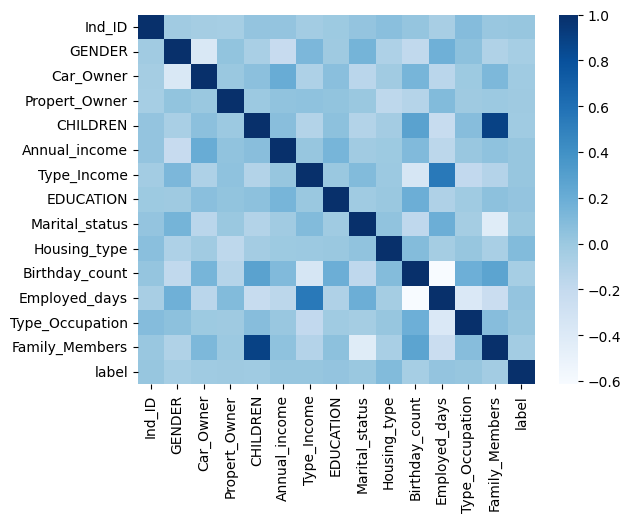

In [70]:
import seaborn as sb
from matplotlib import pyplot as plt

sb.heatmap(corr,
           cmap="Blues",
           annot=False,
           cbar=True)


## Preparação das amostras para treino e teste preliminares

### Concatenação do espaço amostral e do espaço de resultados

In [71]:
X = df.drop('label', axis=1)
y = df.label

X.shape, y.shape

((1541, 14), (1541,))

### Divisão das Amostras em Amostras de Treino e Amostras de Teste (3/4 x 1/4)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print ("Shape das amostras de treino")
print (X_train.shape)
print ("Shape das amostras de teste")
print (X_test.shape)

Shape das amostras de treino
(1155, 14)
Shape das amostras de teste
(386, 14)


## K-Nearest-Neighbors


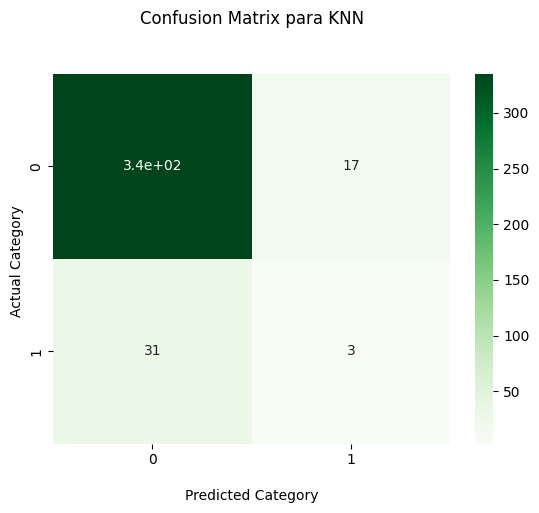

Report para KNN
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       352
           1       0.15      0.09      0.11        34

    accuracy                           0.88       386
   macro avg       0.53      0.52      0.52       386
weighted avg       0.85      0.88      0.86       386

F1 Score: 0.11111111111111112


In [73]:
clf_knn = KNeighborsClassifier(n_neighbors=5)

clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_knn)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')
ax.set_title('Confusion Matrix para KNN\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

plt.show()

print("Report para KNN")
print(classification_report(y_test, y_pred_knn))
print('F1 Score:',f1_score(y_test, y_pred_knn))

## Logistic Regression

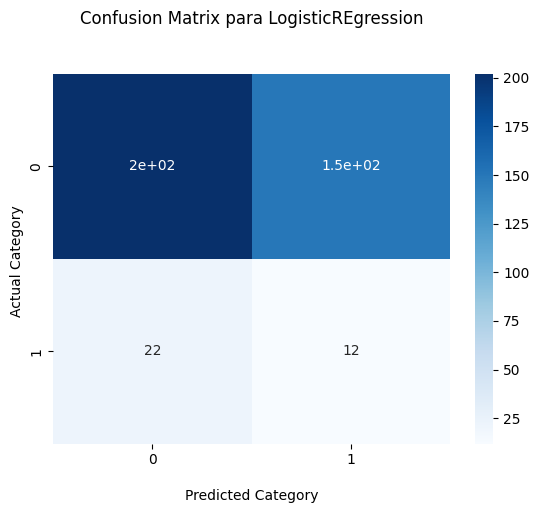

Report para LogisticRegression
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       352
           1       0.07      0.35      0.12        34

    accuracy                           0.55       386
   macro avg       0.49      0.46      0.41       386
weighted avg       0.83      0.55      0.65       386

F1 Score: 0.12244897959183673


In [74]:
clf_LR = LogisticRegression(class_weight='balanced')
clf_LR.fit(X_train, y_train)

y_pred_LR = clf_LR.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_LR)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix para LogisticREgression\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

plt.show()

print("Report para LogisticRegression")
print(classification_report(y_test, y_pred_LR))
print('F1 Score:', f1_score(y_test, y_pred_LR))

## Gaussian Naive Bayes

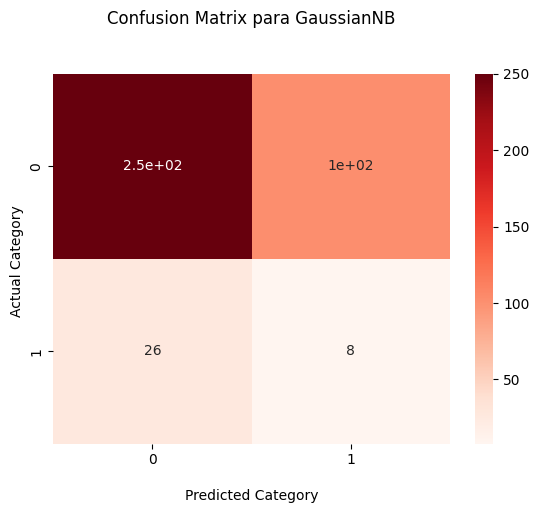

Report para GaussianNB
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       352
           1       0.07      0.24      0.11        34

    accuracy                           0.67       386
   macro avg       0.49      0.47      0.45       386
weighted avg       0.83      0.67      0.74       386

F1 Score: 0.11111111111111113


In [75]:
clf_NB = GaussianNB(priors=[0.5,0.5])

clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_NB)

ax = sns.heatmap(cf_matrix, annot=True, cmap="Reds")
ax.set_title('Confusion Matrix para GaussianNB\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

plt.show()

print("Report para GaussianNB")
print(classification_report(y_test, y_pred_NB))
print('F1 Score:',f1_score(y_test, y_pred_NB))

## Decision Tree

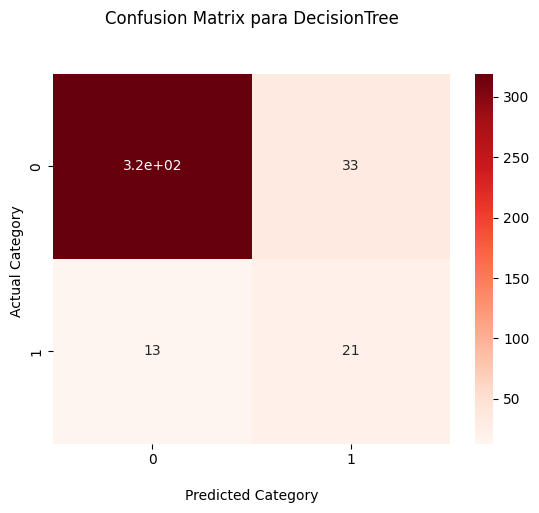

Report para DecisionTree
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       352
           1       0.39      0.62      0.48        34

    accuracy                           0.88       386
   macro avg       0.67      0.76      0.71       386
weighted avg       0.91      0.88      0.89       386

F1 Score: 0.4772727272727273


In [76]:
clf_DT = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
clf_DT.fit(X_train, y_train)

y_pred_DT = clf_DT.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_DT)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Confusion Matrix para DecisionTree\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

plt.show()

print("Report para DecisionTree")
print(classification_report(y_test, y_pred_DT))
print('F1 Score:',f1_score(y_test, y_pred_DT))

## Conclusões preliminares

A implementação dos quatro modelos propostos, preliminarmente, evidenciam que para uma amostra profundamente desbalanceada, com o uso de todas as features e sem maiores refinamentos de parâmetros, todos os modelos sairam-se razoavelmente bem na previsão dos labels '0', isto é, na concessão do credito rotativo. Entretanto tanto o Gaussian Naive Bayes quanto a Regressao Logística falharam miseravelmente na predição dos labels '1', o que significa que estes modelos neste contexto sem refinamento levaria ao Órgão Credor a perder bons clientes desta modalidade de crédito.Enquanto o KNN por sua vez, falha de maneira oposta, levanto o concedente do Credito Rotativo a aceitar clientes "inadequados"

Desta forma, os 3 métodos, apesar de apresentarem F1-Score  em geral acima de 0.70 para a predição das concessões, apresenta Score de aproximadamente 0.11 para a predição das rejeições, o que leva os 3 primeiros modelos a um Score geral em torno de 0.11.

Assim, de modo geral, o Decision Tree foi o metodo mais robusto dos 4 por apresentar um resoltado mais consistente sem maiores cuidados com os dados ou na parametrização dos modelos.

Na próxima secção deste estudo implementaremos algumas otimizações e ajustes finos a fim de melhorar o desempenho dos modelos propostos e verificaremos se estas otimizações implicam em ganhos de eficiencia.


# Otimizações e Ajustes-Finos

## Balanceamento dos dados
Na fase de EDA e tratamento dos dados constatou-se que os dados encontram-se imensamente desbalanceados de modo que o numero de concessoes (1371) é mais de oito vezes maior que o numero de rejeições (170). É suposto que este desbalanceamento extremo crie algum tipo de vies ou distorção nas predições. Assim, a primeira consideração que se fará será retrabalhar os modelos com dados balanceados.



In [125]:
X_o = df.drop('label', axis=1)

from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

cc = ClusterCentroids(sampling_strategy="hard", random_state=42)
XR, yR = cc.fit_resample(X_o, y)
balancer = RandomOverSampler(sampling_strategy='minority')
XR, yR = balancer.fit_resample(X_o, y)
XR.shape, yR.shape

((2742, 14), (2742,))

## Nova separação de amostras em Treino e Teste

In [126]:
XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, test_size=0.25, random_state=42)
print (XR_train.shape, yR_train.shape)
print (XR_test.shape, yR_test.shape)

(2056, 14) (2056,)
(686, 14) (686,)


In [127]:
dfR = pd.concat([XR, yR], axis=1)
corrR = dfR.corr()

print(dfR.corr())

                   Ind_ID    GENDER  Car_Owner  Propert_Owner  CHILDREN  \
Ind_ID           1.000000 -0.008510  -0.082700       0.004626  0.069436   
GENDER          -0.008510  1.000000  -0.355533       0.099928 -0.053574   
Car_Owner       -0.082700 -0.355533   1.000000      -0.033892  0.034850   
Propert_Owner    0.004626  0.099928  -0.033892       1.000000 -0.018080   
CHILDREN         0.069436 -0.053574   0.034850      -0.018080  1.000000   
Annual_income   -0.032907 -0.189798   0.204954       0.034147  0.120046   
Type_Income     -0.019460  0.205618  -0.158435       0.066187 -0.114833   
EDUCATION        0.026673  0.051090   0.066744       0.098244  0.045367   
Marital_status   0.047387  0.143927  -0.190105       0.025184 -0.102360   
Housing_type     0.150774 -0.094771  -0.066970      -0.253345 -0.065936   
Birthday_count   0.040817 -0.181981   0.180614      -0.127458  0.282622   
Employed_days   -0.030575  0.225520  -0.228443       0.081115 -0.243329   
Type_Occupation  0.052221

<Axes: title={'center': 'Correlações de valor negativo mais expressivas'}>

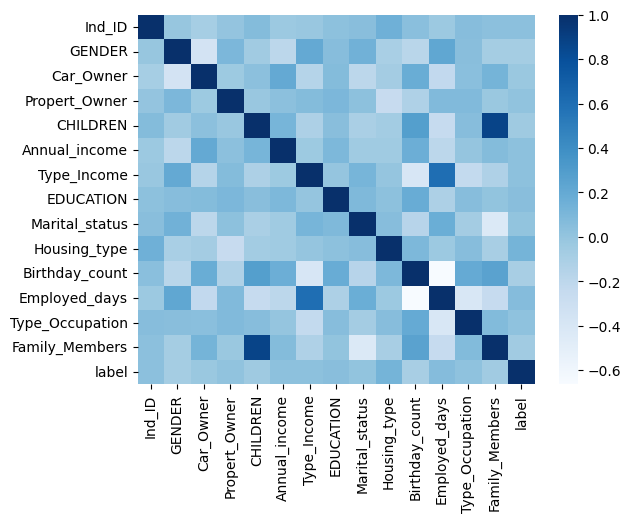

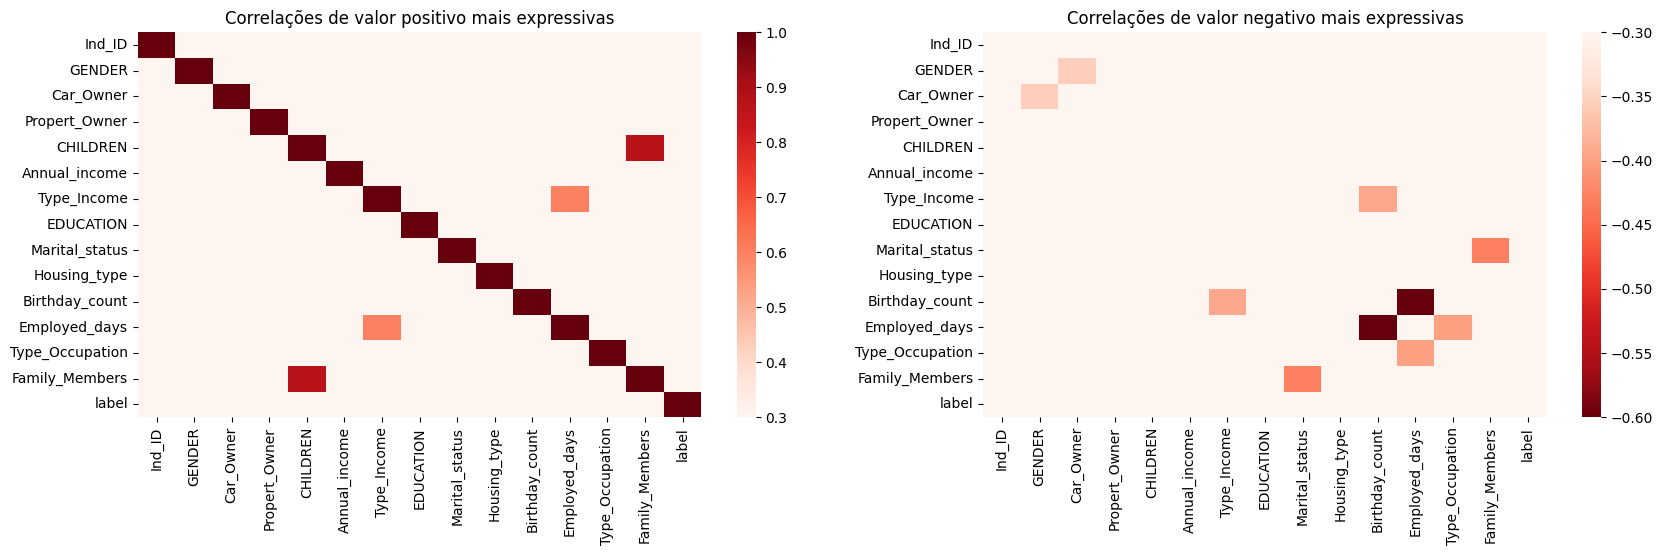

In [128]:
sb.heatmap(corrR,
           cmap="Blues",
           annot=False,
           cbar=True)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

axes[0].set_title('Correlações de valor positivo mais expressivas')
sb.heatmap(corrR,
           vmin=0.3,
           vmax=1.0,
           cmap="Reds",
           yticklabels=True,
           cbar=True,
           annot=False, ax=axes[0])

axes[1].set_title('Correlações de valor negativo mais expressivas')
sb.heatmap(corrR,
           vmin=-0.6,
           vmax=-0.3,
           cmap="Reds_r",
           yticklabels=True,
           cbar=True,
           annot=False, ax=axes[1])

## Descarte de features "redundantes" e pouco relevantes
As analise de correlação acima  evidenciam quais atributos mantem maior correlação com o label apontado. Entretanto a observação dos heatmaps destacam que há atributos com elevada correlação entre si e, portanto, podem ser redundantes e resultar em pouca melhoria de precisão em nossos modelos.

Maiores correlações:

* Propert_Owner   :  0.397160  
* Car_Owner       :  0.316258  
* EDUCATION       :  0.309861  
* CHILDREN        :  0.244410  
* Housing_type    :  0.206474  
* Family_Members  :  0.192524  
* Marital_status  :  0.159460  
* Type_Occupation :  0.154627  
* Annual_income   : -0.136739  
* Employed_days   : -0.126349  
* GENDER          : -0.107447  
* Birthday_count  :  0.051473  
* Type_Income     :  0.016145  

Para alem de uma evidente correlação entre birthday count e aspectos como membros da familia, crianças, estado civil etc, nota-se também correlações, entre nivel de educação com salario anual, e propriedades de carros e imoveis. Entretanto, num primeiro momento, far-se-á um corte duro um pouco alem da metade das variáveis de menor correlação com o label para verificar se resulta em simplificação dos modelos.


In [129]:
atributos_relevantes = ["Propert_Owner",
                        "Car_Owner",
                        "EDUCATION",
                        "CHILDREN",
                        "Housing_type",
                        "Family_Members",
                        "Marital_status",
                        "Type_Occupation"]

## Ensaios de Otimização


### K-Nearest Neighbors
Procedeu-se inicialmente uma selecão exaustiva de features desconsiderando a pre seleção de features realizada acima como termo de referência;

Os desempennhos nesta tarefa (uma analise de 12910 conjuntos de features) foram:
*   K = 3 :  3:03 min para F1-score de 0.785
*   K = 5 :  2:43 min para F1-Score de 0.821
*   k = 7 :  2:47 min para F1-score de 0.811
*   k = 9 :  2:47 min para F1-Score de 0.831
*   k = 11:  2:56 min para F1-Score de 0.298





In [130]:
clf_knn_o = KNeighborsClassifier(n_neighbors=3)

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(
    estimator=clf_knn_o,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train, yR_train)

features_selecionadas = [f for f in _efs.best_feature_names_]
features_selecionadas_KNN = features_selecionadas
print ('\nFeatures selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)

clf_knn_o.fit(XR_train[features_selecionadas], yR_train)
y_pred_knn_o = clf_knn_o.predict(XR_test[features_selecionadas])

print("Report para KNN")
print(classification_report(yR_test, y_pred_knn_o))
print('F1 Score:', f1_score(yR_test, y_pred_knn_o))

Features: 12910/12910


Features selecionadas:
['Ind_ID', 'Employed_days']
Best F-Score:
0.893740579694769
Report para KNN
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       350
           1       0.83      0.99      0.90       336

    accuracy                           0.89       686
   macro avg       0.90      0.89      0.89       686
weighted avg       0.91      0.89      0.89       686

F1 Score: 0.898236092265943


Em seguida procedeu-se uma nova feature selection exaustiva, porem desprezados os dados previamente detectados como potencialmente destardados para fins de comparação do desempenho:

Os desempennhos nesta tarefa (uma analise de 255 conjuntos de features) foram:
*   K = 3 :  0:03 min para F1-score de 0.638
*   K = 5 :  0:04 min para F1-Score de 0.785
*   k = 7 :  0:04 min para F1-score de 0.771
*   k = 9 :  0:07 min para F1-Score de 0.694
*   k = 11:  0:05 min para F1-Score de 0.711

In [131]:
clf_knn_oo = KNeighborsClassifier(n_neighbors=5)

efs = EFS(
    estimator=clf_knn_o,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train[atributos_relevantes], yR_train)

features_selecionadas = [f for f in efs.best_feature_names_]
print ('Features selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)

clf_knn_oo.fit(XR_train[features_selecionadas], yR_train)
y_pred_knn_oo = clf_knn_oo.predict(XR_test[features_selecionadas])

print("Report para KNN")
print(classification_report(yR_test, y_pred_knn_oo))
print('F1 Score:', f1_score(yR_test, y_pred_knn_oo))

Features: 255/255

Features selecionadas:
['Propert_Owner', 'Car_Owner', 'EDUCATION', 'CHILDREN', 'Housing_type', 'Family_Members', 'Marital_status', 'Type_Occupation']
Best F-Score:
0.8038266831814417
Report para KNN
              precision    recall  f1-score   support

           0       0.75      0.63      0.69       350
           1       0.67      0.79      0.72       336

    accuracy                           0.71       686
   macro avg       0.71      0.71      0.70       686
weighted avg       0.71      0.71      0.70       686

F1 Score: 0.7232876712328766


**Conclusão**:

A redução de pouco menos de metade das variáveis de menor correlação com o resultado tornou a feature selection exaustiva muito mais ágil quando permite passar da ordem de grandeza dos minutos para a ordem de grandeza dos segundos. Por ter menos recursos para analisar, porem, perde-se um pouco de precisão na detecção, mas não tanto proporcionalmente ao ganho de desempenho notado. Uma feature selection mais criteriosa certamente resultaria em desempenhos semelhantes no que tange ao parametro F1-Score com o ganho em termos de desempenho e generalização do modelo, como se pode notar ao compararmos K=11 com conjuntos de features mais rico contraposto ao conjunto de features "empobrecido"

### Logistic Regression

Semelhante ao que foi feito com o KNN, precedeu-se a selecao exaustiva de features para logistic regression para termos de referência.

A regressão logística com todas as features levou em torno de 4:11 min para obter um F-score de 0.727

In [132]:
clf_LR_o = LogisticRegression(max_iter=200)


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(
    estimator=clf_LR_o,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train, yR_train)

features_selecionadas = [f for f in efs.best_feature_names_]
features_selecionadas_LR = features_selecionadas
print ('Features selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)

clf_LR_o.fit(XR_train[features_selecionadas], yR_train)
y_pred_LR_o = clf_LR_o.predict(XR_test[features_selecionadas])

print("Report para LogisticRegression")
print(classification_report(yR_test, y_pred_LR_o))
print('F1 Score:', f1_score(yR_test, y_pred_LR_o))

Features: 12910/12910

Features selecionadas:
['Car_Owner', 'CHILDREN', 'EDUCATION', 'Housing_type', 'Employed_days', 'Type_Occupation']
Best F-Score:
0.5985074221887791
Report para LogisticRegression
              precision    recall  f1-score   support

           0       0.54      0.85      0.66       350
           1       0.60      0.23      0.33       336

    accuracy                           0.55       686
   macro avg       0.57      0.54      0.49       686
weighted avg       0.57      0.55      0.50       686

F1 Score: 0.3311827956989247


Em seguida procedeu-se uma nova feature selection exaustiva, porem desprezados os dados previamente detectados como potencialmente destardados para fins de comparação do desempenho. Neste cenário, a feature selection levou apenas 4 segundos e resultou em virtualmente o mesmo F1-Score de 0.693

In [133]:
clf_LR_oo = LogisticRegression(max_iter=200)


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(
    estimator=clf_LR_o,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train[atributos_relevantes], yR_train)

features_selecionadas = [f for f in efs.best_feature_names_]
print ('Features selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)


clf_LR_oo.fit(XR_train[features_selecionadas], yR_train)
y_pred_LR_oo = clf_LR_oo.predict(XR_test[features_selecionadas])

print("Report para LogisticRegression")
print(classification_report(yR_test, y_pred_LR_oo))
print('F1 Score:', f1_score(yR_test, y_pred_LR_oo))

Features: 255/255

Features selecionadas:
['Propert_Owner', 'Car_Owner', 'Housing_type', 'Family_Members', 'Type_Occupation']
Best F-Score:
0.5861211529842696
Report para LogisticRegression
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       350
           1       0.55      0.46      0.50       336

    accuracy                           0.55       686
   macro avg       0.55      0.55      0.54       686
weighted avg       0.55      0.55      0.55       686

F1 Score: 0.5016077170418005


**Conclusão**:

De maneira semelhante ao ocorrido com o KNN, a regressão logística também se aproveitou do ganho de performance devida a redução de pouco menos da metade das variáveis. Porém, neste caso, a perda em termos de F1-score foi ainda menor. Enquanto a busca exaustiva com todas as variáveis levou a uma seleção que resultou em um F1-score de 0.727, na busca com menos variáveis, o F1-Score resultante chegou proximo a 0.7.


### Gaussian Naive Bayes

Mais uma vez, o procedimento é o mesmo já feito com o KNN e Logistic Regression. Precedeu-se a selecao exaustiva de features com todas as variáveis limitadas a um total de oito para Gaussian Naive Bayes model para termos de referência.

A regressão logística com todas as features levou em torno de 2:40 min para obter um F-score de 0.8

In [134]:
clf_GNB_o = GaussianNB(priors=[0.5,0.5])


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(
    estimator=clf_GNB_o,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train, yR_train)

features_selecionadas = [f for f in efs.best_feature_names_]
features_selecionadas_GNB = features_selecionadas

print ('Features selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)

clf_GNB_o.fit(XR_train[features_selecionadas], yR_train)
y_pred_GNB_o = clf_GNB_o.predict(XR_test[features_selecionadas])

print("Report para Gaussian Naive Bayes")
print(classification_report(yR_test, y_pred_GNB_o))
print('F1 Score:', f1_score(yR_test, y_pred_GNB_o))

Features: 12910/12910

Features selecionadas:
['GENDER', 'Type_Income', 'EDUCATION', 'Housing_type', 'Birthday_count', 'Type_Occupation', 'Family_Members']
Best F-Score:
0.6138327571448168
Report para Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.54      0.83      0.65       350
           1       0.60      0.27      0.38       336

    accuracy                           0.56       686
   macro avg       0.57      0.55      0.52       686
weighted avg       0.57      0.56      0.52       686

F1 Score: 0.37627811860940696


Consoante o que se fez nas demais otimizações, precedeu-se a seleção exaustiva de features com escopo inicial reduzido a pouco mais da metade das features de maior correlação com os resultados da saída para efeitos de comparação.

Neste caso, a nova seleção de features consumiu meros 0:02 seg e ainda assim obteve um F1-Score de 0.704.

In [135]:
clf_GNB_oo = GaussianNB(priors=[0.5,0.5])


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(
    estimator=clf_GNB_oo,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train[atributos_relevantes], yR_train)

features_selecionadas = [f for f in efs.best_feature_names_]
print ('Features selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)

clf_GNB_oo.fit(XR_train[features_selecionadas], yR_train)
y_pred_GNB_oo = clf_GNB_oo.predict(XR_test[features_selecionadas])

print("Report para Gaussian Naive Bayes")
print(classification_report(yR_test, y_pred_GNB_oo))
print('F1 Score:', f1_score(yR_test, y_pred_GNB_oo))

Features: 255/255

Features selecionadas:
['Propert_Owner', 'EDUCATION', 'Housing_type', 'Family_Members', 'Marital_status']
Best F-Score:
0.5932514429501246
Report para Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.54      0.89      0.67       350
           1       0.64      0.21      0.31       336

    accuracy                           0.55       686
   macro avg       0.59      0.55      0.49       686
weighted avg       0.59      0.55      0.50       686

F1 Score: 0.3139013452914798


**Conclusão**:

Conforme ocorreu nos casos anteriores, constatou-se uma expressiva melhora de desempenho entre a seleção de features considerando todas as variáveis e a seleção de features com apenas parte das variáveis. Porem, no caso do Gaussian Naive Bayes, o desempenho foi muito superior, enquanto o F1-Score teve uma queda mais significativa, embora ainda se mantenha em patamares bem razoáveis em termos de predição.

### Decision Tree
Finalmente, procedeu-se a mesma analise feita nos 3 modelos anteriores de seleção exaustiva indiscriminada de features para termos de comparação.

Neste cenário, a busca exaustiva conseguiu um F1-Score de 0.757 ao longo de uma execução que tomou 3:15s. Um aspecto interessante a se notar é que a Decision Tree consegue este F-score altisssimo com apenas 3 features

In [136]:
clf_DT_o = DecisionTreeClassifier(criterion='entropy', )


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(
    estimator=clf_DT_o,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train, yR_train)

features_selecionadas = [f for f in efs.best_feature_names_]
features_selecionadas_DT = features_selecionadas
print ('Features selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)

clf_DT_o.fit(XR_train[features_selecionadas], yR_train)
y_pred_DT_o = clf_DT_o.predict(XR_test[features_selecionadas])

print("Report para Decision Tree")
print(classification_report(yR_test, y_pred_DT_o))
print('F1 Score:', f1_score(yR_test, y_pred_DT_o))

Features: 12910/12910

Features selecionadas:
['Ind_ID', 'CHILDREN', 'EDUCATION', 'Employed_days']
Best F-Score:
0.9227497172741228
Report para Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       350
           1       0.91      0.99      0.95       336

    accuracy                           0.95       686
   macro avg       0.95      0.95      0.95       686
weighted avg       0.95      0.95      0.95       686

F1 Score: 0.9473684210526315


Como ultimo passo desta nossa primeira análise preliminar de otimizações dos modelos, procederemos a busca exaustiva sobre o escopo restrito das features mais relevantes para o resultado segundo a analise feita anteriormente.

E neste caso, como era esperado por indução das otimizações anteriores, o F-Score manteve-se aproximadamente o mesmo - 0.775 - mas o desempenho melhorou substancialmente ao consumir apenas 3 segundos para a execução

In [137]:
clf_DT_oo = DecisionTreeClassifier(criterion='entropy', )


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs = EFS(
    estimator=clf_DT_oo,
    min_features=1,
    max_features=8,
    scoring='roc_auc',
    cv=2,
)
_efs = efs.fit(XR_train[atributos_relevantes], yR_train)

features_selecionadas = [f for f in efs.best_feature_names_]
print ('Features selecionadas:')
print (features_selecionadas)
print ('Best F-Score:')
print ( efs.best_score_)

clf_DT_oo.fit(XR_train[features_selecionadas], yR_train)
y_pred_DT_oo = clf_DT_oo.predict(XR_test[features_selecionadas])

print("Report para Decision Tree")
print(classification_report(yR_test, y_pred_DT_oo))
print('F1 Score:', f1_score(yR_test, y_pred_DT_oo))

Features: 255/255

Features selecionadas:
['Propert_Owner', 'Car_Owner', 'EDUCATION', 'CHILDREN', 'Housing_type', 'Family_Members', 'Marital_status', 'Type_Occupation']
Best F-Score:
0.8545585465500343
Report para Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.73      0.79       350
           1       0.76      0.89      0.82       336

    accuracy                           0.81       686
   macro avg       0.82      0.81      0.81       686
weighted avg       0.82      0.81      0.81       686

F1 Score: 0.819672131147541


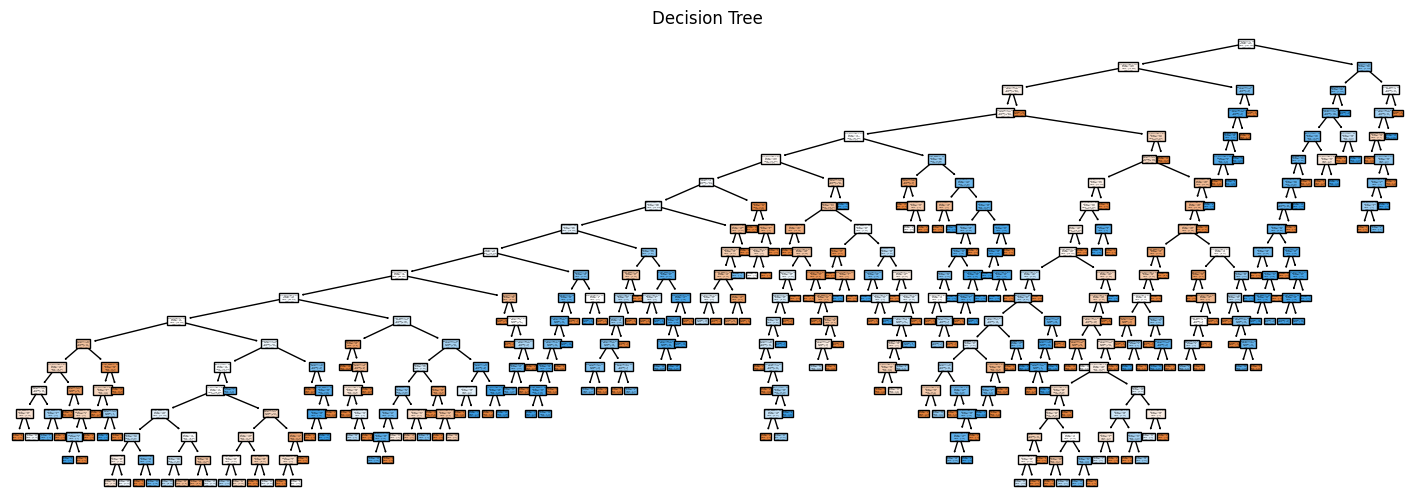

In [138]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 6))
plot_tree(clf_DT_oo, filled=True, feature_names=features_selecionadas, class_names=True)
plt.title("Decision Tree")
plt.show()

---
# Conclusão

A modelização de um problema de ciencia de dados pode ser afetada por uma infinidade de aspectos que vão desde o tratamento adequado dos dados no que tange a missing data, bem como enviesamentos por desbalanceamento de dados.

A feature selection adequada pode fazer toda a diferença no desempenho de um modelo preditivo. Como pudemos constatar, sem tratamento algum, o melhor dos 4 modelos não teve um desempenho melhor do que literalmente uma moeda jogada ao acaso.

Entretanto, com o balanceamento de dados por undersampling, bem como uma feature selection exaustiva, todos os modelos que desempenhavam por volta de 0.1 alcançaram indices satisfatorios por volta dos 0.7 a 0.8 de f1-score.

Em problemas mais complexos, a feature selection exaustiva pode demandar muito tempo de processamento a ponto de tornar-se inviável ou desinteressante buscar o ajuste fino caso hava variáveis em excesso consideradas ja que a complexidade desta busca, **aparentemente**, cresce de maneira exponencial.

A redução do escopo inicial de features a considerar na busca exaustiva pode ser a diferença entre ser viável fazer-se ajustes finos nos modelos de modo a se atingir um desempenho máximo em termos de precisao e f1-score na construção de um modelo de aprendizagem.



### Resultados comparativos
Abaixo vemos as matrizes de confusão dos resultados dos desempenhos dos diversos modelos implementados, onde evidencia-se a melhoria do resultado dos modelos otimizados ( na segunda e terceira colunas ) comparados ao resultado do modelo implementado sem qualquer critério de otimização.

<Axes: title={'center': 'Confusion Matrix para Decision Tree (Muito Otimizado)'}>

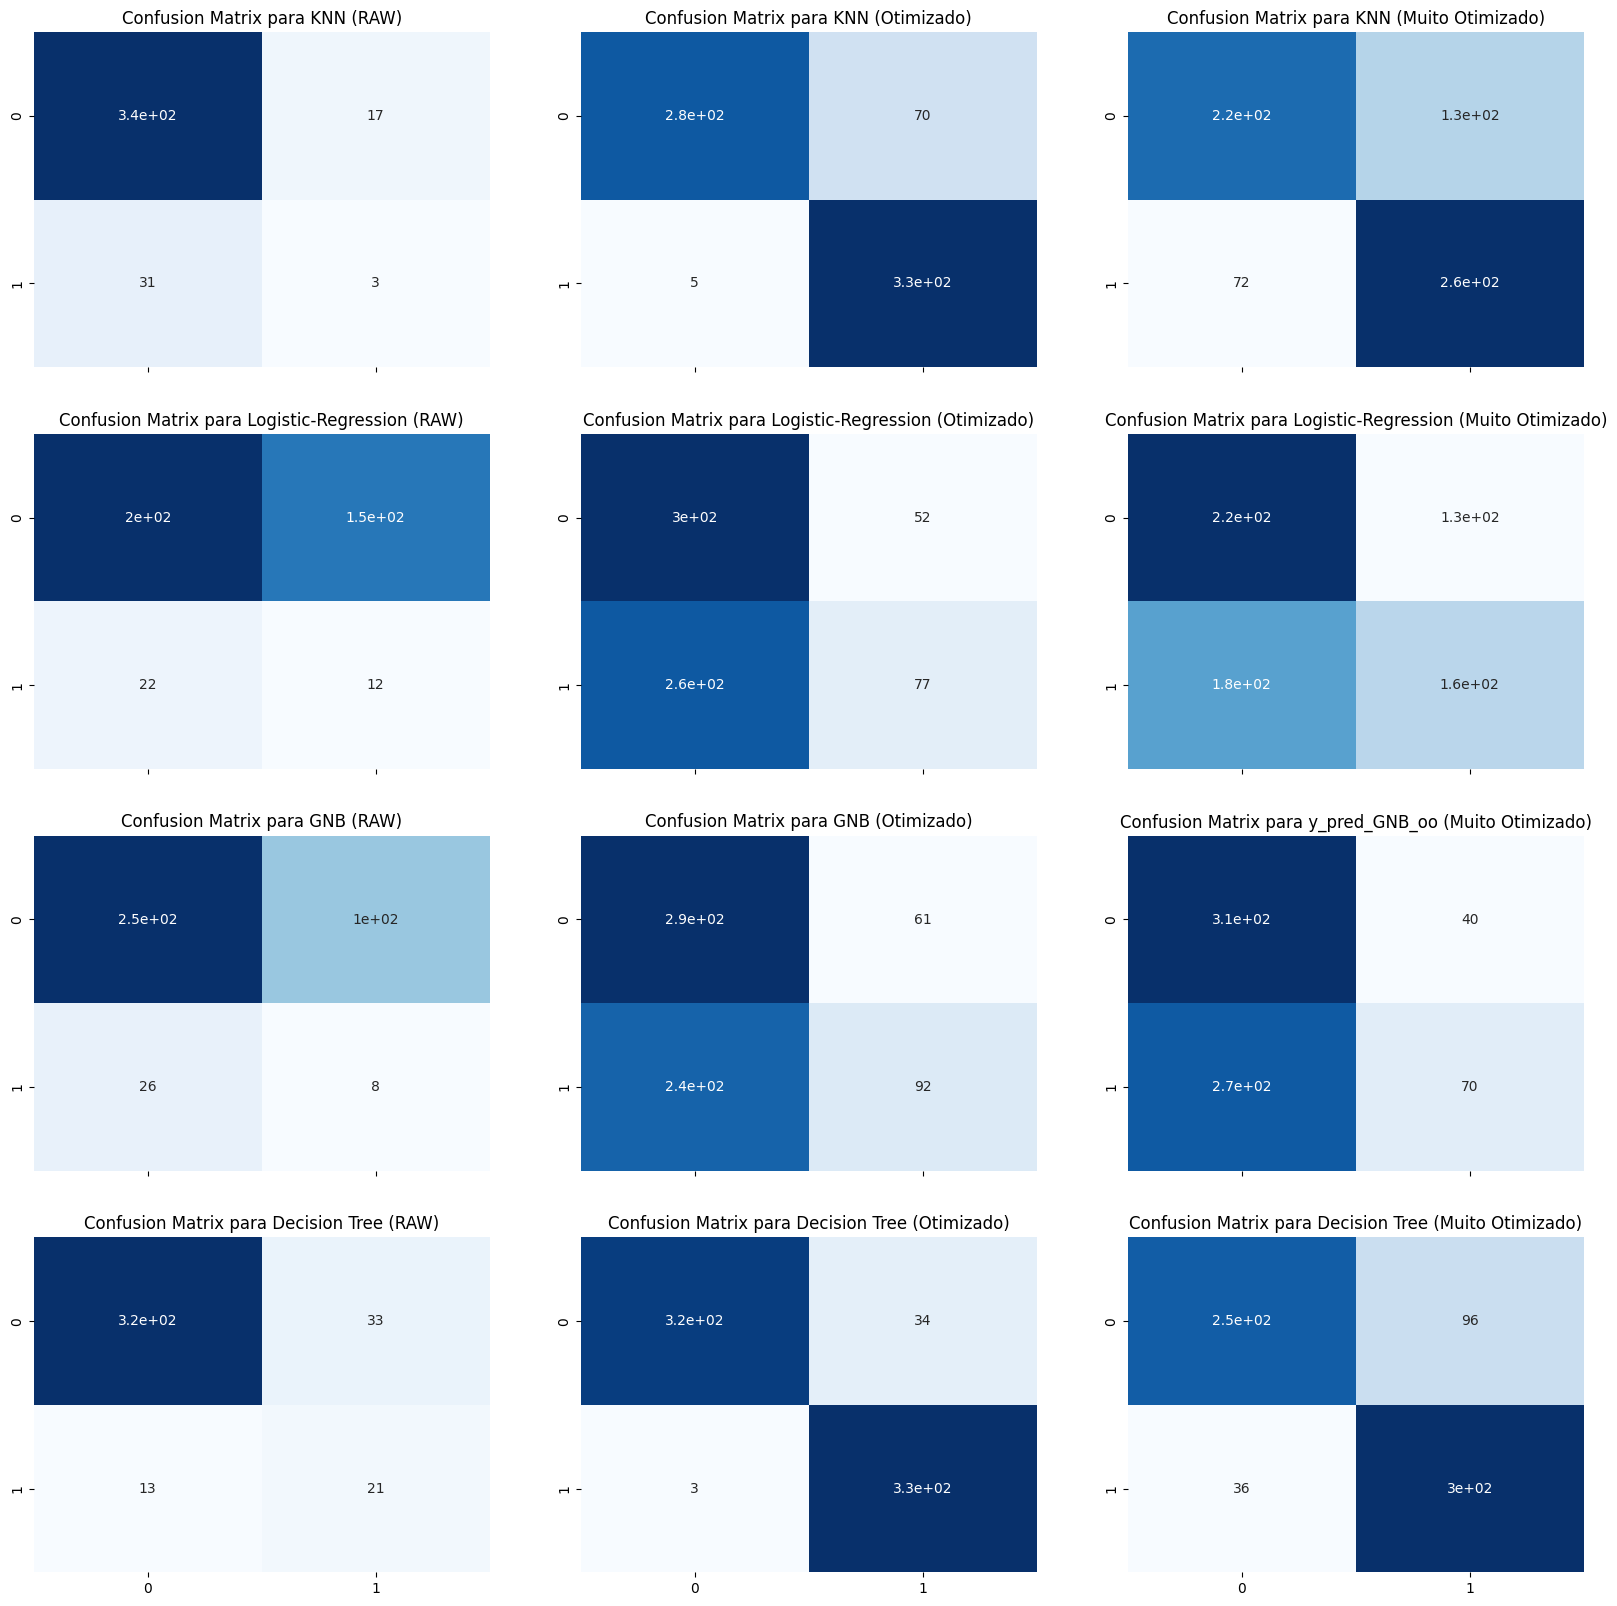

In [139]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(20,20))

cf_matrix = confusion_matrix(y_test, y_pred_knn)

axes[0,0].set_title('Confusion Matrix para KNN (RAW)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[0,0])
plt.plot()

cf_matrix = confusion_matrix(yR_test, y_pred_knn_o)

axes[0,1].set_title('Confusion Matrix para KNN (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[0,1])


cf_matrix = confusion_matrix(yR_test, y_pred_knn_oo)

axes[0,2].set_title('Confusion Matrix para KNN (Muito Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[0,2])




cf_matrix = confusion_matrix(y_test, y_pred_LR)

axes[1,0].set_title('Confusion Matrix para Logistic-Regression (RAW)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[1,0])
plt.plot()

cf_matrix = confusion_matrix(yR_test, y_pred_LR_o)

axes[1,1].set_title('Confusion Matrix para Logistic-Regression (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[1,1])


cf_matrix = confusion_matrix(yR_test, y_pred_LR_oo)

axes[1,2].set_title('Confusion Matrix para Logistic-Regression (Muito Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[1,2])



cf_matrix = confusion_matrix(y_test, y_pred_NB)

axes[2,0].set_title('Confusion Matrix para GNB (RAW)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[2,0])
plt.plot()

cf_matrix = confusion_matrix(yR_test, y_pred_GNB_o)

axes[2,1].set_title('Confusion Matrix para GNB (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[2,1])


cf_matrix = confusion_matrix(yR_test, y_pred_GNB_oo)

axes[2,2].set_title('Confusion Matrix para y_pred_GNB_oo (Muito Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[2,2])




cf_matrix = confusion_matrix(y_test, y_pred_DT)

axes[3,0].set_title('Confusion Matrix para Decision Tree (RAW)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[3,0])
plt.plot()

cf_matrix = confusion_matrix(yR_test, y_pred_DT_o)

axes[3,1].set_title('Confusion Matrix para Decision Tree (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[3,1])


cf_matrix = confusion_matrix(yR_test, y_pred_DT_oo)

axes[3,2].set_title('Confusion Matrix para Decision Tree (Muito Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[3,2])

<Axes: title={'center': 'Confusion Matrix para Decision Tree (Otimizado)'}>

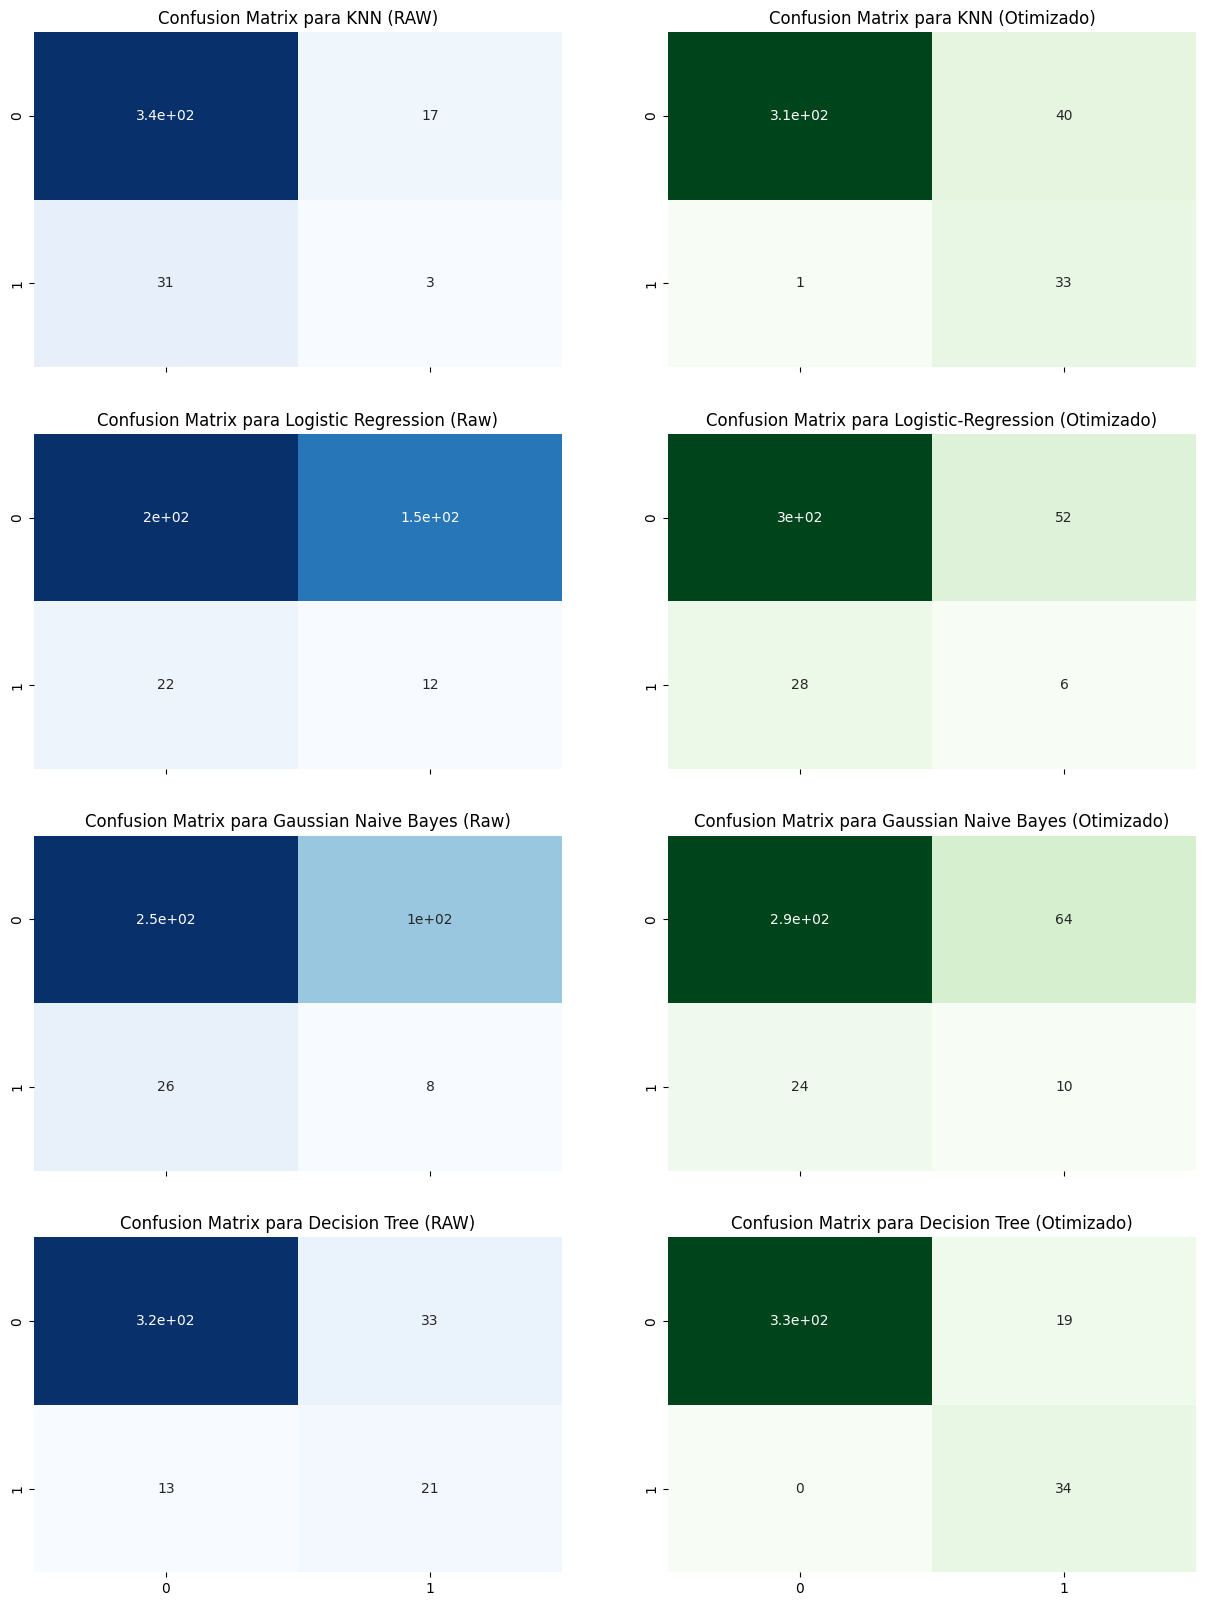

In [142]:
y_pred_LR_F = clf_LR_o.predict(X_test[features_selecionadas_LR])
y_pred_DT_F = clf_DT_o.predict(X_test[features_selecionadas_DT])
y_pred_KNN_F = clf_knn_o.predict(X_test[features_selecionadas_KNN])
y_pred_GNB_F = clf_GNB_o.predict(X_test[features_selecionadas_GNB])

fig, axes = plt.subplots(4, 2, sharex=True, figsize=(15,20))



cf_matrix = confusion_matrix(y_test, y_pred_knn)

axes[0,0].set_title('Confusion Matrix para KNN (RAW)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[0,0])
plt.plot()

cf_matrix = confusion_matrix(y_test, y_pred_KNN_F)

axes[0,1].set_title('Confusion Matrix para KNN (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, ax=axes[0,1])





cf_matrix = confusion_matrix(y_test, y_pred_LR)

axes[1,0].set_title('Confusion Matrix para Logistic Regression (Raw)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[1,0])


cf_matrix = confusion_matrix(y_test, y_pred_LR_F)

axes[1,1].set_title('Confusion Matrix para Logistic-Regression (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, ax=axes[1,1])
plt.plot()





cf_matrix = confusion_matrix(y_test, y_pred_NB)

axes[2,0].set_title('Confusion Matrix para Gaussian Naive Bayes (Raw)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[2,0])


cf_matrix = confusion_matrix(y_test, y_pred_GNB_F)

axes[2,1].set_title('Confusion Matrix para Gaussian Naive Bayes (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, ax=axes[2,1])





cf_matrix = confusion_matrix(y_test, y_pred_DT)

axes[3,0].set_title('Confusion Matrix para Decision Tree (RAW)')
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, ax=axes[3,0])
plt.plot()

cf_matrix = confusion_matrix(y_test, y_pred_DT_F)

axes[3,1].set_title('Confusion Matrix para Decision Tree (Otimizado)')
sns.heatmap(cf_matrix, annot=True, cmap='Greens', cbar=False, ax=axes[3,1])


